In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## ***Manipulation 2***

***Exercice 1 (Filtrage d'image)***

        1-

In [35]:
cameraman = cv.imread('../images/cameraman.png', cv.IMREAD_GRAYSCALE)
cameraman is not None

True

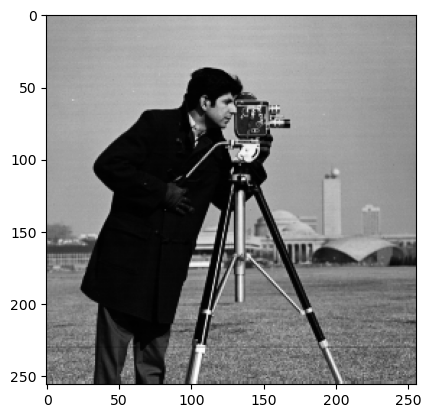

In [36]:
plt.imshow(cameraman, cmap='gray')

        2-

In [37]:
shape = cameraman.shape
noise = np.abs(np.random.normal(10, 25, shape)).astype(np.uint8)
cameraman_noise = cv.add(cameraman, noise)

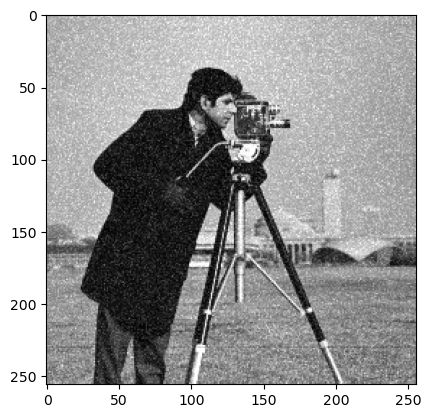

In [38]:
plt.imshow(cameraman_noise, cmap='gray', vmax=255)

        3-

In [39]:
kernel_3 = np.ones((3, 3)) / 9
kernel_5 = np.ones((5, 5)) / 25

In [40]:
cam_3 = cv.filter2D(cameraman_noise, -1, kernel_3)
cam_5 = cv.filter2D(cameraman_noise, -1, kernel_5)
cam_med = cv.medianBlur(cameraman, 3)

        4-

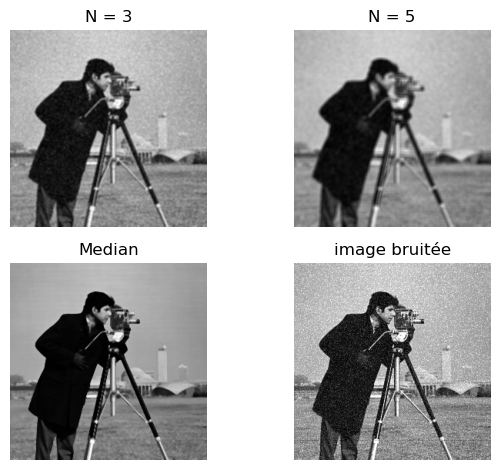

In [41]:
plt.subplot(2, 2, 1), plt.imshow(cam_3, cmap='gray'), plt.title('N = 3'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(cam_5, cmap='gray'), plt.title('N = 5'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(cam_med, cmap='gray'), plt.title('Median'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(cameraman_noise, cmap='gray'), plt.title('image bruitée'), plt.axis('off')
plt.tight_layout()

        5-

In [42]:
def salt_pepper(img, prob):
    black = 0
    white = 255
    output = img.copy()
    probs = np.random.random(output.shape)
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

(<matplotlib.image.AxesImage at 0x7f456afa8950>, (-0.5, 255.5, 255.5, -0.5))

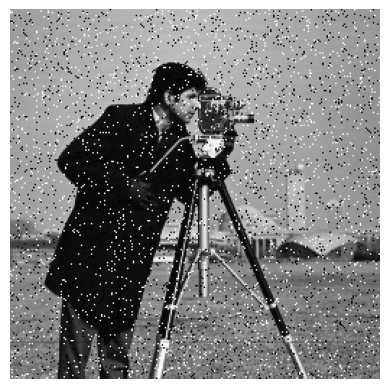

In [43]:
sp_cameramam = salt_pepper(cameraman, 0.07)
plt.imshow(sp_cameramam, cmap='gray'), plt.axis('off')

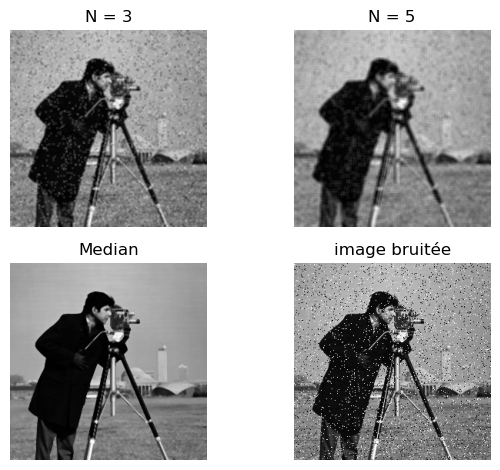

In [44]:
sp_cam_3 = cv.filter2D(sp_cameramam, -1, kernel_3)
sp_cam_5 = cv.filter2D(sp_cameramam, -1, kernel_5)
sp_cam_med = cv.medianBlur(cameraman, 3)
plt.subplot(2, 2, 1), plt.imshow(sp_cam_3, cmap='gray'), plt.title('N = 3'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(sp_cam_5, cmap='gray'), plt.title('N = 5'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(sp_cam_med, cmap='gray'), plt.title('Median'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(sp_cameramam, cmap='gray'), plt.title('image bruitée'), plt.axis('off')
plt.tight_layout()

***Exercice 2 (Détection de contours)***

        1-

(<matplotlib.image.AxesImage at 0x7f456ae20950>,
 Text(0.5, 1.0, 'Image originale'))

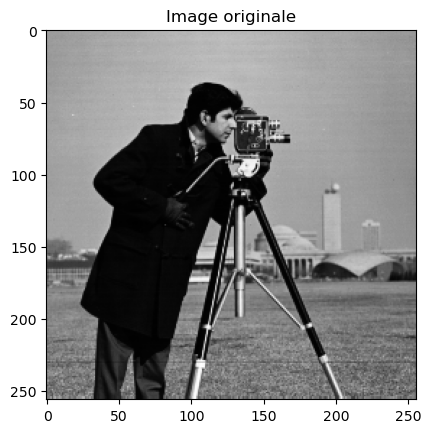

In [45]:
plt.imshow(cameraman, cmap='gray'), plt.title("Image originale")

        2-

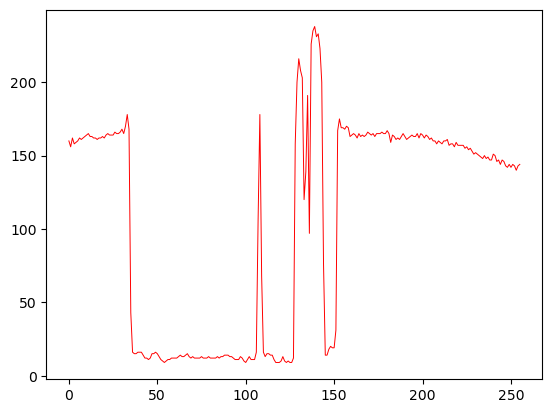

In [46]:
cam_100 = cameraman[100, :]
plt.plot(cam_100, c='r', lw=0.7)

        3-

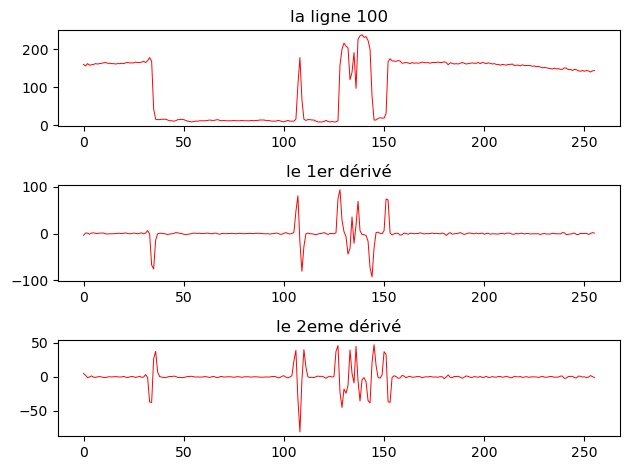

In [47]:
derv = np.gradient(cam_100)
derv_2 = np.gradient(derv)
plt.subplot(3, 1, 1), plt.plot(cam_100, c='r', lw=0.7), plt.title("la ligne 100")
plt.subplot(3, 1, 2), plt.plot(derv, c='r', lw=0.7), plt.title("le 1er dérivé")
plt.subplot(3, 1, 3), plt.plot(derv_2, c='r', lw=0.7), plt.title("le 2eme dérivé")
plt.tight_layout()

        4-

In [48]:
from skimage.filters import roberts, prewitt, sobel

In [49]:
rob_cam = roberts(cameraman)

        5-

In [50]:
pr_cam = prewitt(cameraman)

        6-

In [51]:
sbl_cam = sobel(cameraman) 

        7-

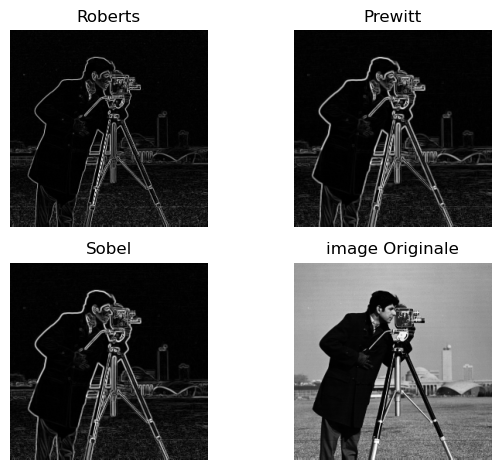

In [52]:
plt.subplot(2, 2, 1), plt.imshow(rob_cam, cmap='gray'), plt.title('Roberts'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(pr_cam, cmap='gray'), plt.title('Prewitt'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(sbl_cam, cmap='gray'), plt.title('Sobel'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(cameraman, cmap='gray'), plt.title('image Originale'), plt.axis('off')
plt.tight_layout()

# **BONUS**

(<matplotlib.image.AxesImage at 0x7f456b295050>, (-0.5, 255.5, 255.5, -0.5))

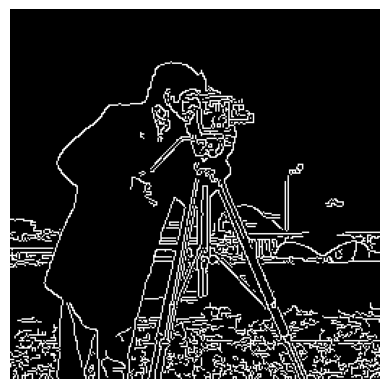

In [53]:
canny_cam = cv.Canny(cameraman, 80, 200)
plt.imshow(canny_cam, cmap='gray'), plt.axis('off')